```jsx
firebase v9
---
Profile.js
import { collection, getDocs, query, where } from "@firebase/firestore";

const getMyNweets = async () => {
const q = query(
collection(dbService, "nweets"),
where("creatorId", "==", userObj.uid)
);
const querySnapshot = await getDocs(q);
querySnapshot.forEach((doc) => {
console.log(doc.id, " => ", doc.data());
});
};
````

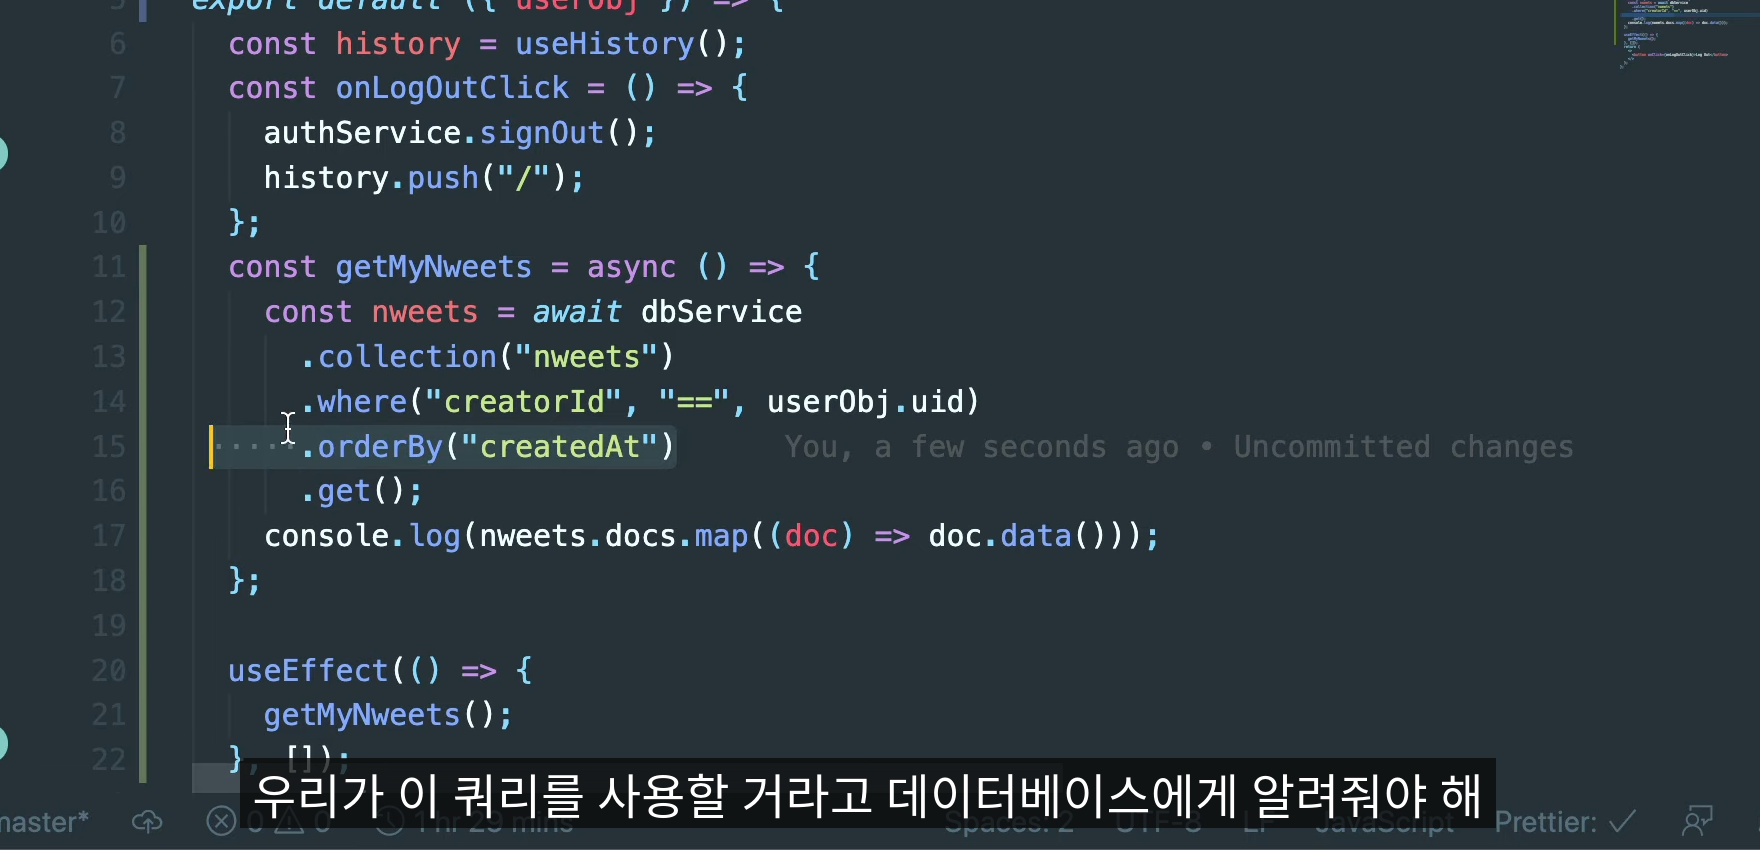

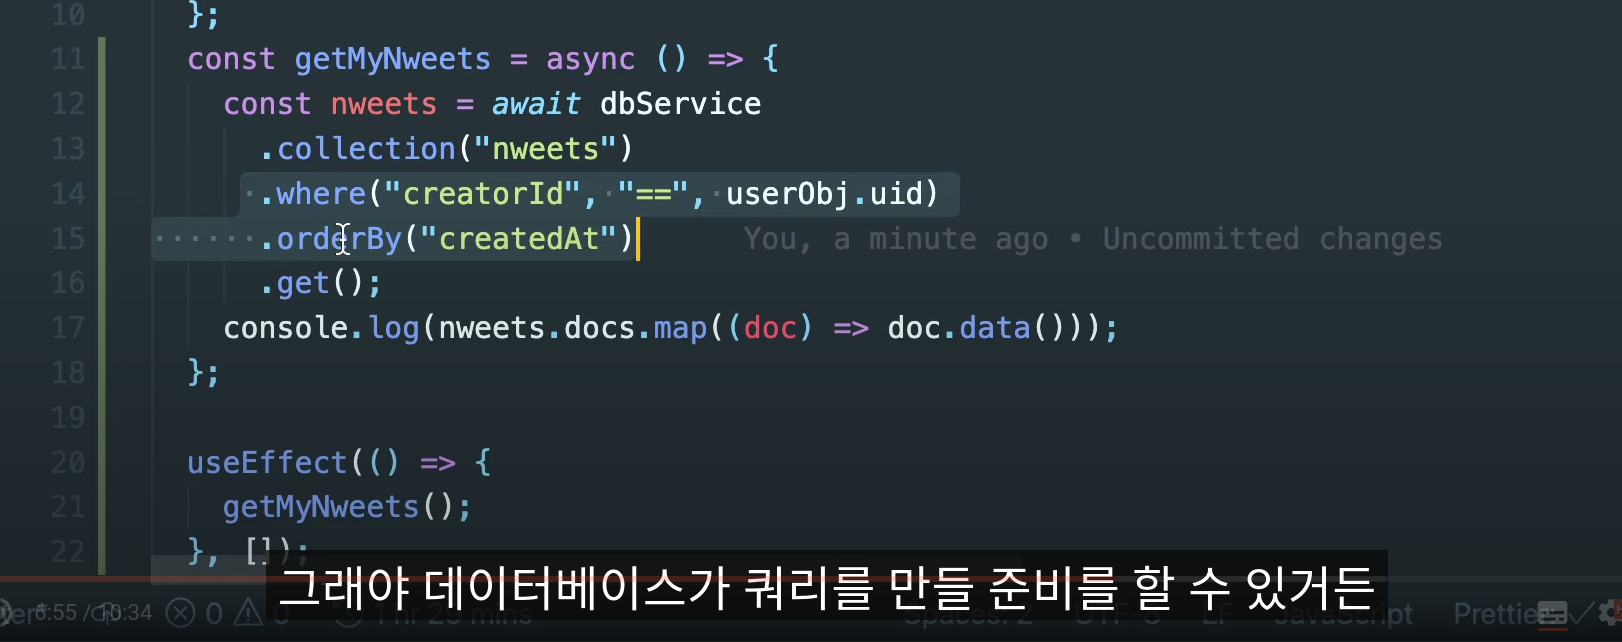

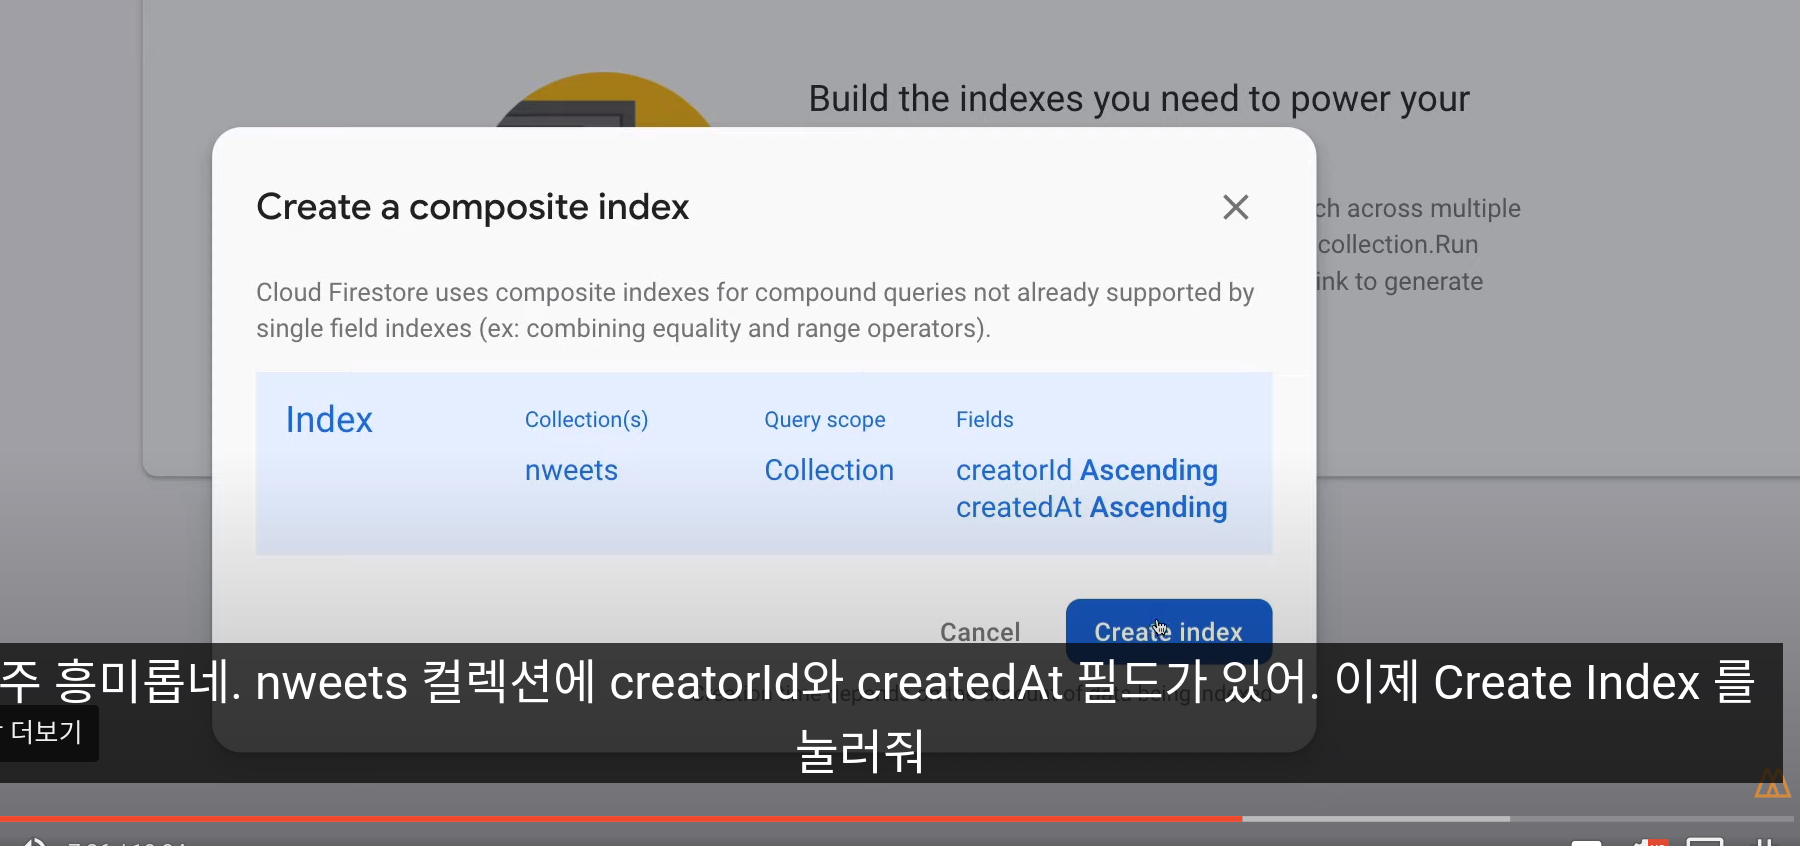

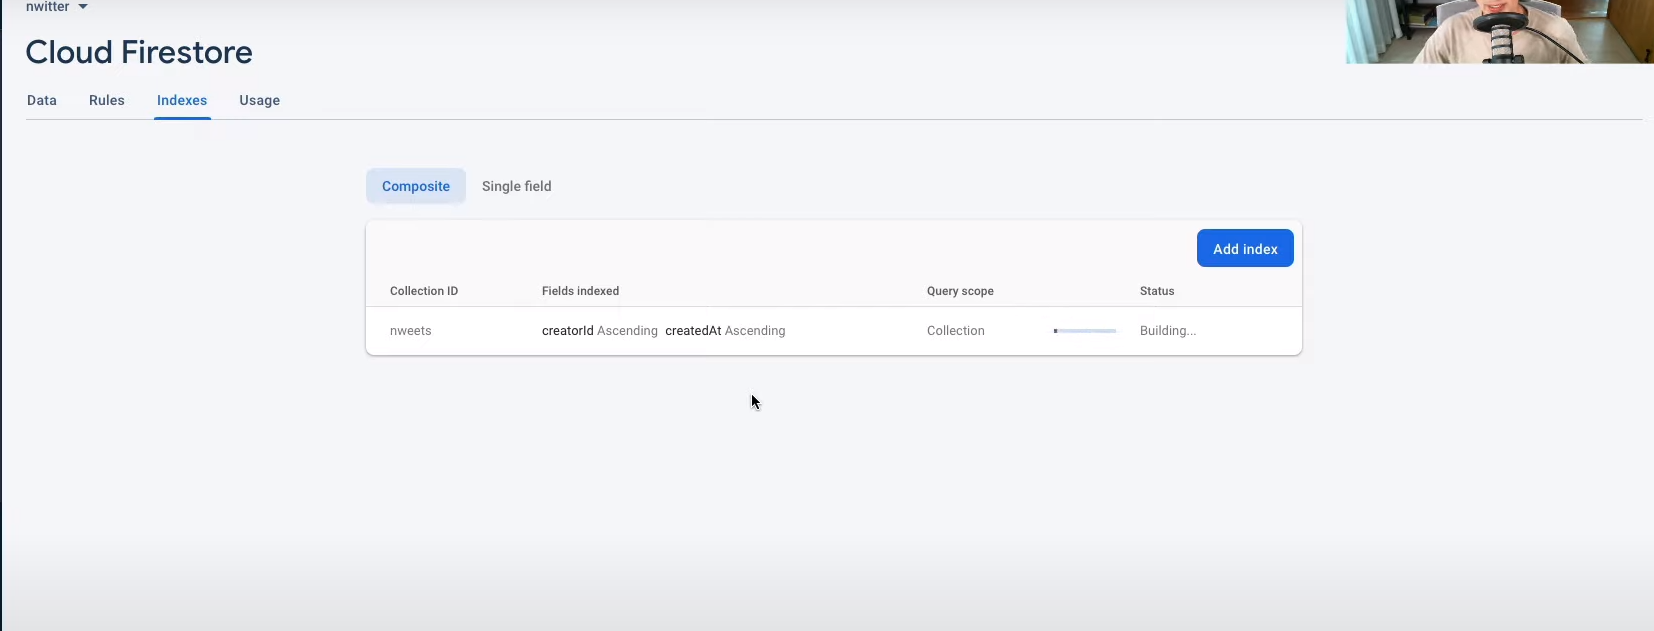

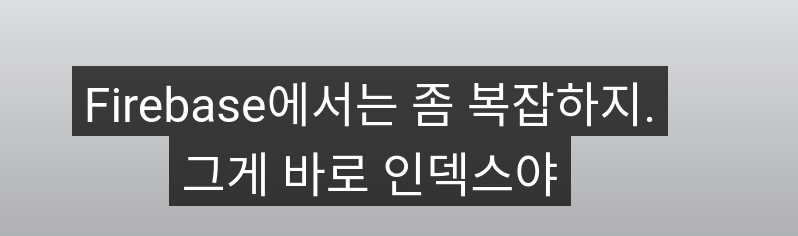

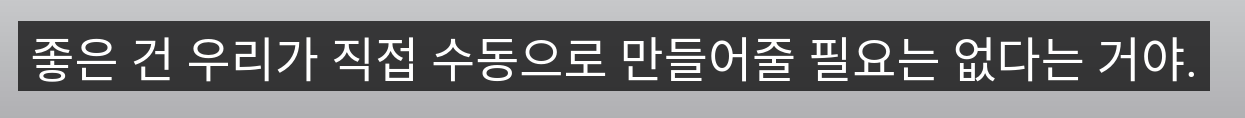

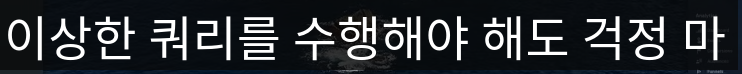

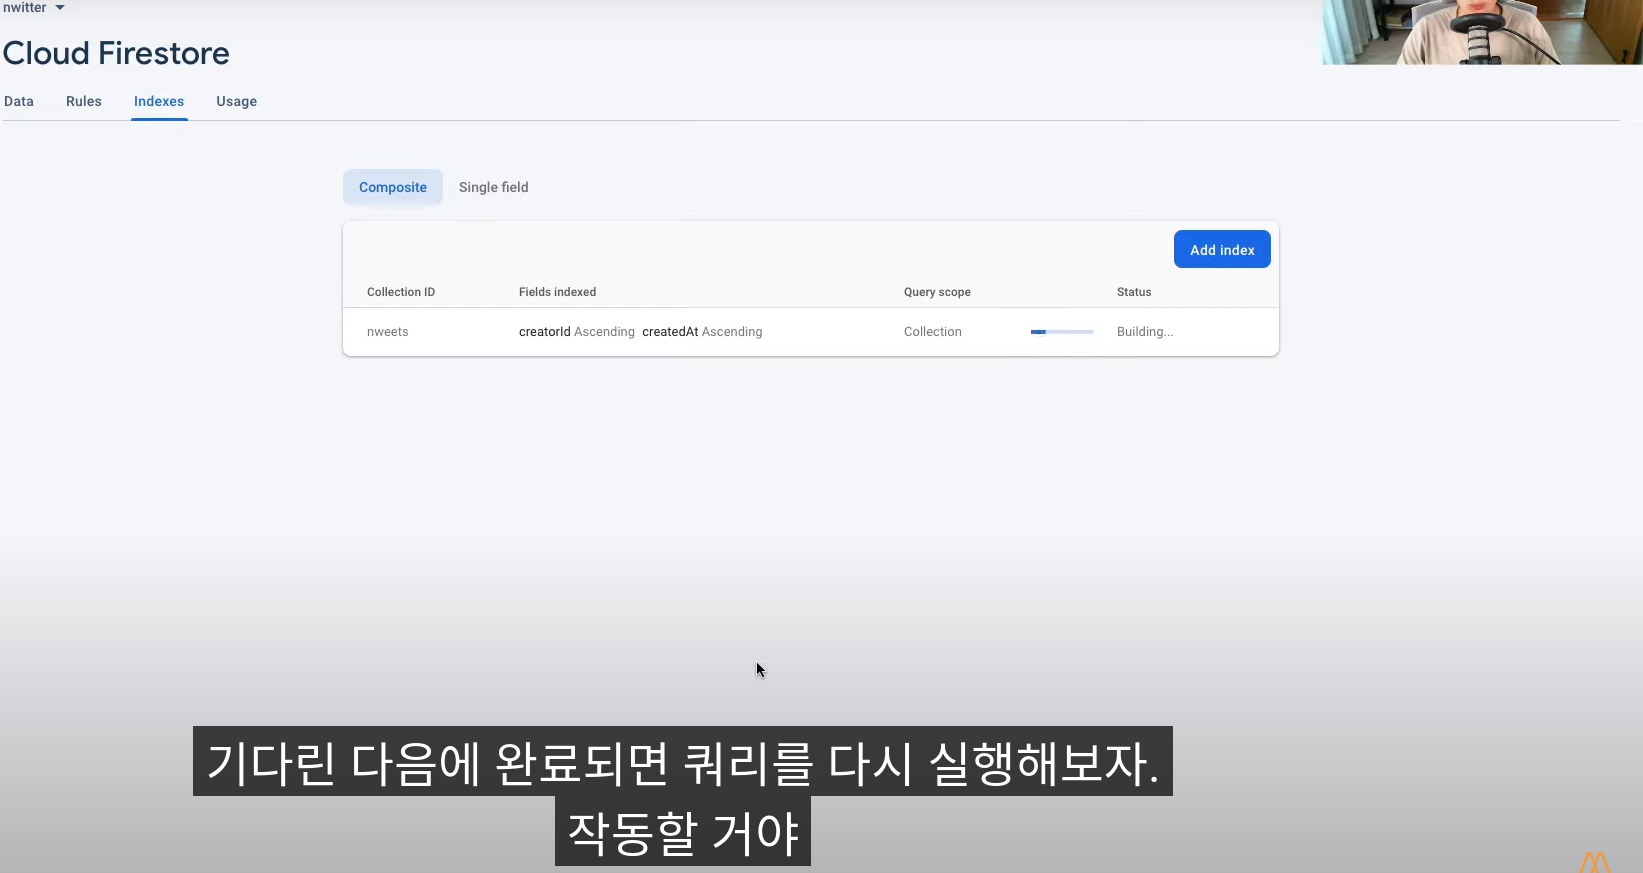

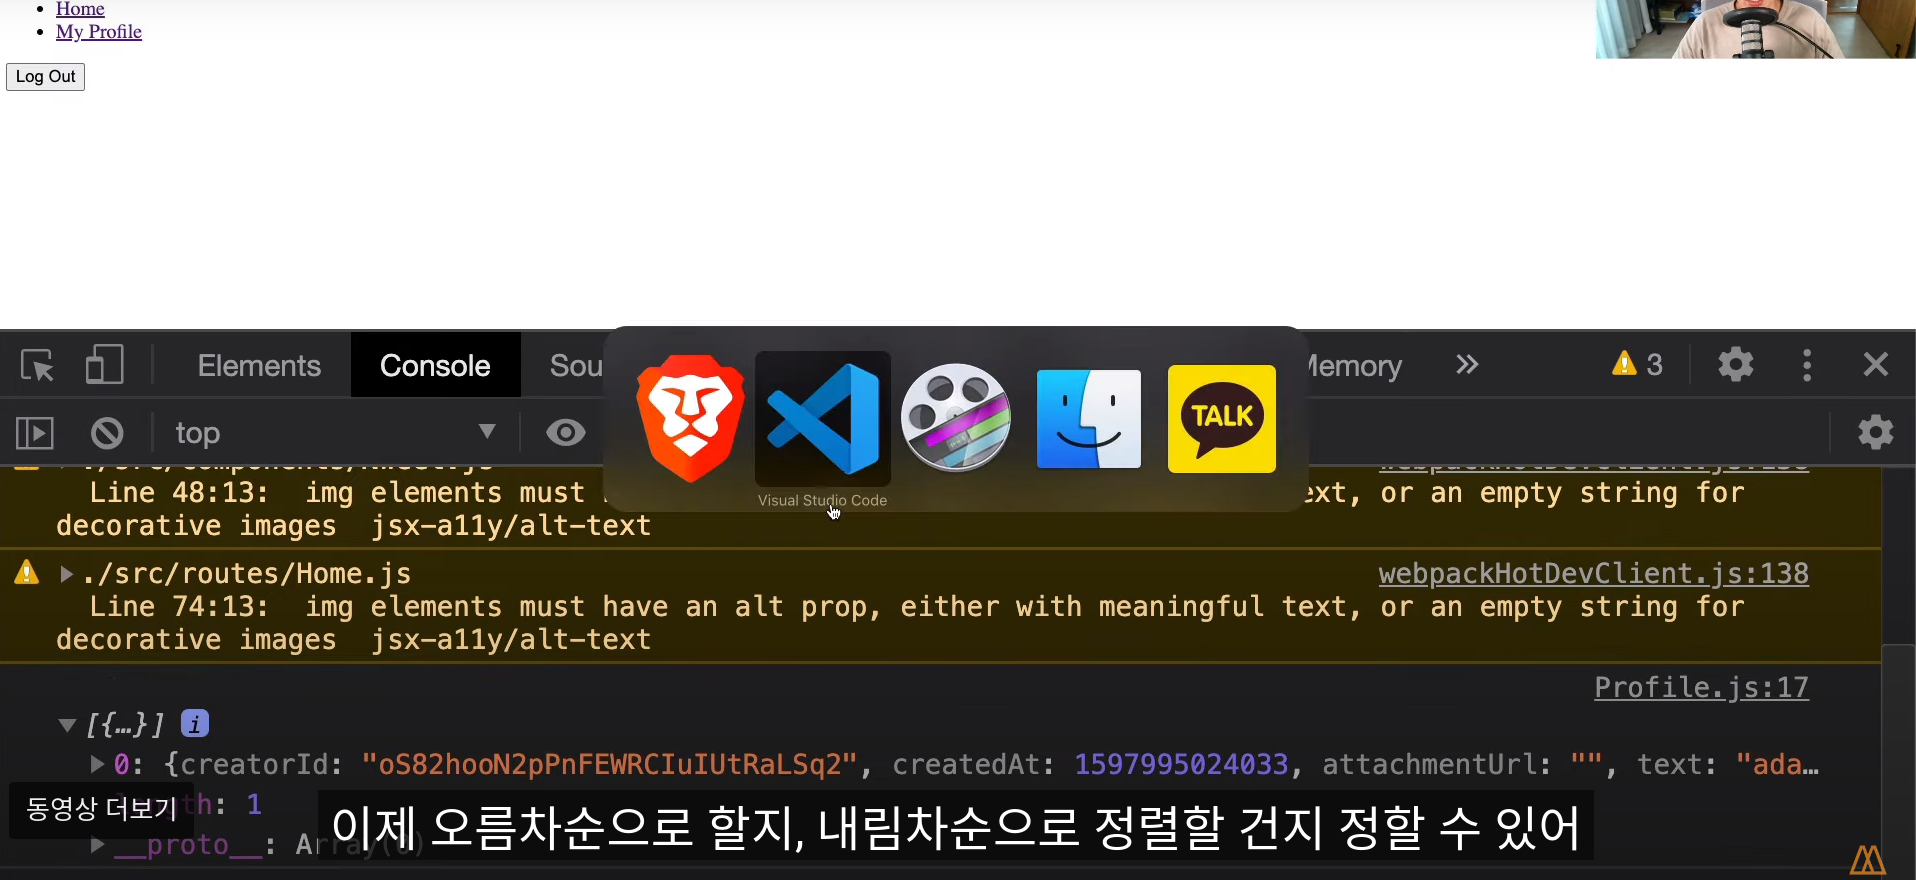

# Profile.js
```jsx
import { authService, dbService } from "fbase";

import { useNavigate } from "react-router-dom";
import { useEffect } from "react";
import { collection, getDocs, orderBy, query, where } from "firebase/firestore";

function Profile({ userObj }) {
  const navigate = useNavigate();
  const onLogOutClick = () => {
    authService.signOut();
    // 버그 발생 위치 : 로그아웃을 하여도 로그인상태로 유지되는 현상 발생
    // 해결방법 : App에 State로 관리 가능
    navigate("/");
  };
  const getMyJweets = async () => {
    const q = query(
      collection(dbService, "jweets"),
      where("creatorId", "==", `${userObj.uid}`),
      orderBy("createdAt", "desc")
    );

    const querySnapshot = await getDocs(q);
    querySnapshot.forEach((doc) => {
      console.log(doc.id, " => ", doc.data());
    });
  };

  useEffect(() => {
    getMyJweets();
  }, []);

  return (
    <>
      <button onClick={onLogOutClick}>Log Out</button>
    </>
  );
}

export default Profile;

```